<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questão-1:-Calculando-$\sqrt-2$." data-toc-modified-id="Questão-1:-Calculando-$\sqrt-2$.-1">Questão 1: Calculando $\sqrt 2$.</a></span></li><li><span><a href="#Questão-2:-Transformada-inversa." data-toc-modified-id="Questão-2:-Transformada-inversa.-2">Questão 2: Transformada inversa.</a></span></li><li><span><a href="#Questão-3:-Contando-domínios-na-Web." data-toc-modified-id="Questão-3:-Contando-domínios-na-Web.-3">Questão 3: Contando domínios na Web.</a></span></li><li><span><a href="#Questão-4:-Gerando-amostras-Normais." data-toc-modified-id="Questão-4:-Gerando-amostras-Normais.-4">Questão 4: Gerando amostras Normais.</a></span></li><li><span><a href="#Questão-5:-Estimando-somas-com-Importance-Sampling." data-toc-modified-id="Questão-5:-Estimando-somas-com-Importance-Sampling.-5">Questão 5: Estimando somas com Importance Sampling.</a></span></li><li><span><a href="#Questão-6:-Integração-de-Monte-Carlo." data-toc-modified-id="Questão-6:-Integração-de-Monte-Carlo.-6">Questão 6: Integração de Monte Carlo.</a></span></li><li><span><a href="#Questão-7:-Gerando-subconjuntos." data-toc-modified-id="Questão-7:-Gerando-subconjuntos.-7">Questão 7: Gerando subconjuntos.</a></span></li></ul></div>

# <center>Método de Monte Carlo e Cadeia de Markov 2020/1

Prof. Daniel Ratton (PESC/COPPE/UFRJ)<br>
Aluna: Ana Luísa Cruz (PESC/COPPE/UFRJ)<br>
DRE: 120000209<br>

---

# <center>3ª Lista de Exercícios

*Nota: A biblioteca ``random`` do Python utiliza o método de Mersenne-Twister por padrão*

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]
#plt.style.use('seaborn-deep')
plt.style.use('seaborn-poster')

In [ ]:
def make_dummy(linhas, limi=0, lims=1):

    # gera matriz {x,y} uniforme entre os limites inferior e superior definidos
    matriz = np.array(
        [[random.uniform(limi, lims),
          random.uniform(limi, lims)]
        for i in np.arange(linhas)],
        dtype=np.single)

    # calcula a classificação dos pontos:
    alvo = []
    for x, y in matriz:
        classifica = [0 if y > 2 - x**2 else 1]
        alvo.append(classifica)

    # adiciona classificação na matriz
    matriz = np.append(matriz, np.array(alvo), axis=1)

    return matriz

In [ ]:
def plota(treino):

    reds = treino[treino[:, -1] == 1]
    blues = treino[treino[:, -1] == 0]

    xr, yr = [reds[:, 0], reds[:, 1]]
    xb, yb = [blues[:, 0], blues[:, 1]]

    plt.plot(xr, yr, '.', color='red', markersize=10)
    plt.plot(xb, yb, '.', color='blue', markersize=10)

    xs = np.linspace(-5., 5., 100)
    ys = 2 - xs**2
    plt.plot(xs, ys, 'r--', color="black")

    axes = plt.gca()
    axes.set_xlim([0, 2])
    axes.set_ylim([0, 2])

    plt.title('Estimador de Monte Carlo para Raiz 2')
    axes.set_aspect('equal', adjustable='box')
    plt.show()
    return

---

## Questão 1: Calculando $\sqrt 2$.

Vimos em aula um algoritmo de Monte Carlo para calcular o valor de $\pi$ utilizando a relação entre áreas. Inspirado nesta mesma ideia, construa um algoritmo de Monte Carlo para calcular o valor de $\sqrt 2$.
1. Descreva a variável aleatória cujo valor esperado está relacionado com $\sqrt 2$. Obtenha analiticamente o valor esperado da sua variável aleatória.
2. Calcule analiticamente a variância dessa variável aleatória.
3. Implemente o método de Monte Carlo para gerar amostras da sua variável aleatória, calculando a média amostral $M_n$ e utilizando-a para estimar $\sqrt 2$. Sua função deve usar o algoritmo de Mersenne Twister para geração de números pseudo-aleatórios uniformes entre 0 e 1 (usar este algoritmo em todos os problemas da lista).
4. Seja $\hat e_n$ o valor do estimador após n amostras. Trace um gráfico do erro relativo do estimador, ou seja $|\hat e_n − \sqrt 2| / \sqrt 2$ em função de $n$, para $n = 1, \dots , 10^6$ (utilize escala  $log − log$ no gráfico). O que você pode concluir?

**Respostas:**

***Item 1.1:***

Suponha um quadrado de lado $2$ e a função $f(x) = 2-x^2$, cujas raízes são $\{-\sqrt 2, \sqrt 2\}$.

A área debaixo da curva $f(x)$ entre $\{0, \sqrt 2\}$ é dada por: 
$A_f = \int^{\sqrt 2}_{0} f(x) dx = -2x|^{\sqrt 2}_{0} = 4\sqrt2/3$

Seja $g(x)$ a indicadora do ponto (x, y) estar abaixo de $f(x)$: $g(x) = \frac{A_{f}}{A_{Q}} = \frac{4\sqrt2/3}{4} = \frac{\sqrt2}{3}$

De maneira que podemos utilizar Monte Carlo para estimar:

$M_n = \frac{1}{n} \sum g(x)$

Pela Lei dos Grandes Números, $M_n$ converge para $\frac{\sqrt2}{3}$, de maneira que podemos estimar $\sqrt2 = 3M_n$

***Item 1.2:***

A V.A. g(x) se comporta como uma Bernoulli($\frac{\sqrt2}{3}$).

De maneira que a variâmcia dela é: 
$Var[g(x)] = \frac{\sqrt2}{3}(1-\frac{\sqrt2}{3}) = \frac{3\sqrt 2 - 2}{9}$

O que nos leva a:
$Var[\sqrt 2] = \frac{3}{n} \left(\frac{3\sqrt 2 - 2}{9} \right) = \frac{3\sqrt 2 - 2}{3n}$

Podemos observar que $Var[\sqrt 2]$ tende a $zero$ quando $n$ for muito grande.

***Item 1.3:***

Pelo Método de Monte Carlo, com n= 1000 temos que o valor de raiz de 2 é: 1.41900


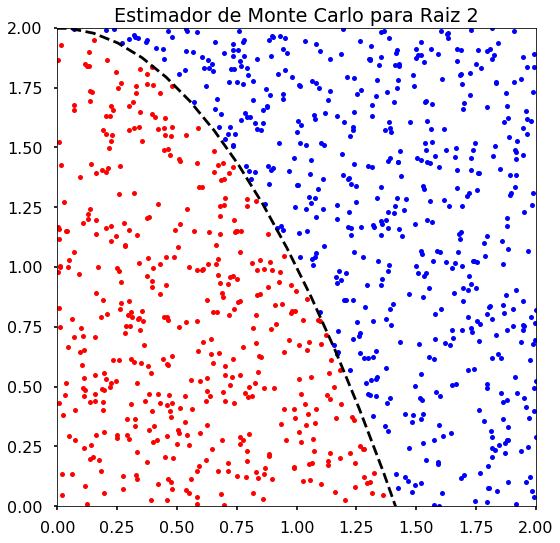

In [ ]:
# sqrt(2) = 1.41421356237


def mc(n):
    z_soma = 0
    for ni in np.arange(n + 1):
        x, y = [random.uniform(0, 2), random.uniform(0, 2)]
        classifica = 0 if y > 2 - x**2 else 1
        z_soma += classifica
    return 3 * z_soma / n


n = 10**3
raiz2 = mc(n)
print('Pelo Método de Monte Carlo, com n=', n,
      'temos que o valor de raiz de 2 é:', '{:.5f}'.format(raiz2))
plota(make_dummy(n, lims=2))

***Item 1.4:***

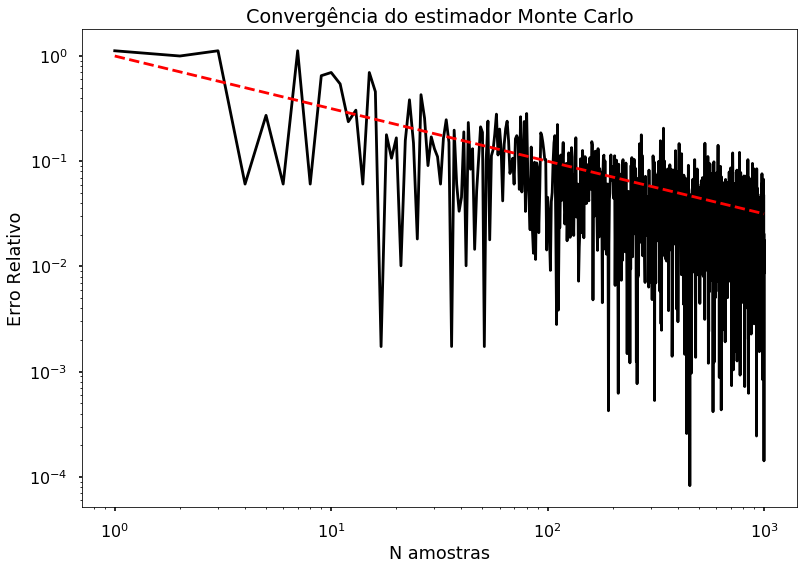

In [ ]:
r2_orig = np.sqrt(2)
nepoch = 10**3
erro_rel = []
for epoch in np.arange(1, nepoch + 1):
    mc_raiz2 = mc(epoch)
    er = abs(mc_raiz2 - r2_orig) / r2_orig
    erro_rel.append(er)

xs = range(1, nepoch + 1)
ys = np.array(erro_rel)
plt.plot(xs, ys, '-', color="black")
plt.plot(xs, 1/np.sqrt(xs), 'r--', color="red") # 1/raiz(N)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N amostras')
plt.ylabel('Erro Relativo')
plt.title('Convergência do estimador Monte Carlo')
plt.show()

---

## Questão 2: Transformada inversa.

Utilize o método da transformada inversa para gerar amostras de uma v.a. X com as seguintes densidades:
1. Distribuição exponencial com parâmetro λ > 0, cuja função densidade é dada por $f_X(x) = \lambda e^{−\lambda x}$, para $x \geq 0$.
2. Distribuição de Pareto com parâmetros $x_0 > 0$ e $\alpha > 0$, cuja função densidade  ́e dada por $f(x) = \frac{\alpha x_0^\alpha}{x^{\alpha +1}}$, para $x \geq x_0$.

***Item 1:***

Neste caso, temos que:

$PDF: f(x) = \lambda e^{−\lambda x}$ 

$CDF: F_X(x) = 1-e^{-\lambda x}$ para $x ≥ 0$

De maneira que:

$x = F^{-1}(U) = -\frac{ln(1-U)}{\lambda}$

Sendo ${U \sim \mathrm {Unif} (0,1)}$

***Item 2:***

$PDF: f(x) = \left(\frac{x x_0^{-\alpha}}{\alpha}\right)^{-\alpha-1}$

$CDF: F_X(x) = 1-\left(\frac{x_0}{x}\right)^{\alpha}$

De maneira que:

$x = F^{-1}(U) = \frac{x_0}{(1-U)^{-\alpha}}$

Sendo ${U \sim \mathrm {Unif} (0,1)}$


In [ ]:
def dist_exp(lmbda=1., X=None, tipo='itf'):
    if tipo == 'pdf':
        return lmbda * np.exp(-lmbda * X)
    elif tipo == 'cdf':
        return 1 - np.exp(-lmbda * X)
    elif tipo == 'itf':  # tranformada inversa
        return -(np.log(1 - X)) / lmbda


def dist_par(x0=1., alpha=1., X=None, tipo='itf'):
    if tipo == 'pdf':
        return alpha * (x0**alpha) / X**(alpha + 1)
    elif tipo == 'cdf':
        return 1 - (x0 / X)**alpha
    elif tipo == 'itf':  # tranformada inversa
        return x0 * (1 - X)**(-1 / alpha)

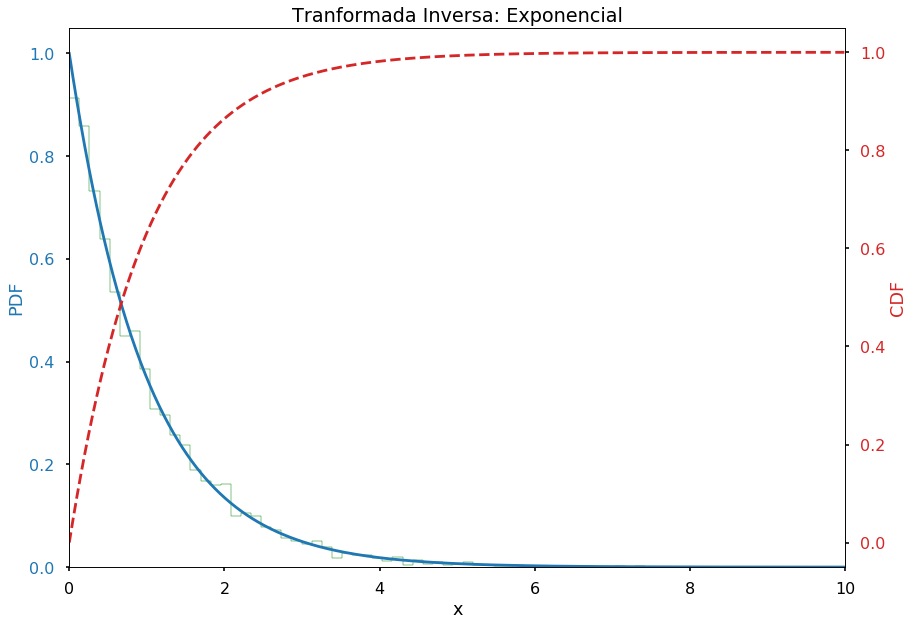

In [ ]:
# Função exponencial:
lmbda = 1.
dx = 0.01
X = np.arange(0, 10, dx)

Ypdf = dist_exp(lmbda=lmbda, X=X, tipo='pdf')
Ycdf = dist_exp(lmbda=lmbda, X=X, tipo='cdf')

U = np.array([random.uniform(0, 1) for i in range(10000)])
Yitf = dist_exp(lmbda=lmbda, X=U, tipo='itf')

# Gráfico

fig, ax1 = plt.subplots()

# PDF
color = 'tab:blue'
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color=color)
ax1.plot(X, Ypdf, color=color)
#ax1.hist(Yitf, int(1/dx), density=True, color='green', histtype='step') # versão nova do matplotlib
ax1.hist(Yitf, int(1 / dx), normed=True, color='green',
         histtype='step')  # versão antiga do matplotlib
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('CDF', color=color)
ax2.plot(X, Ycdf, 'r--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tranformada Inversa: Exponencial')
fig.tight_layout()
ax1.set_xlim([0, 10])
plt.show()

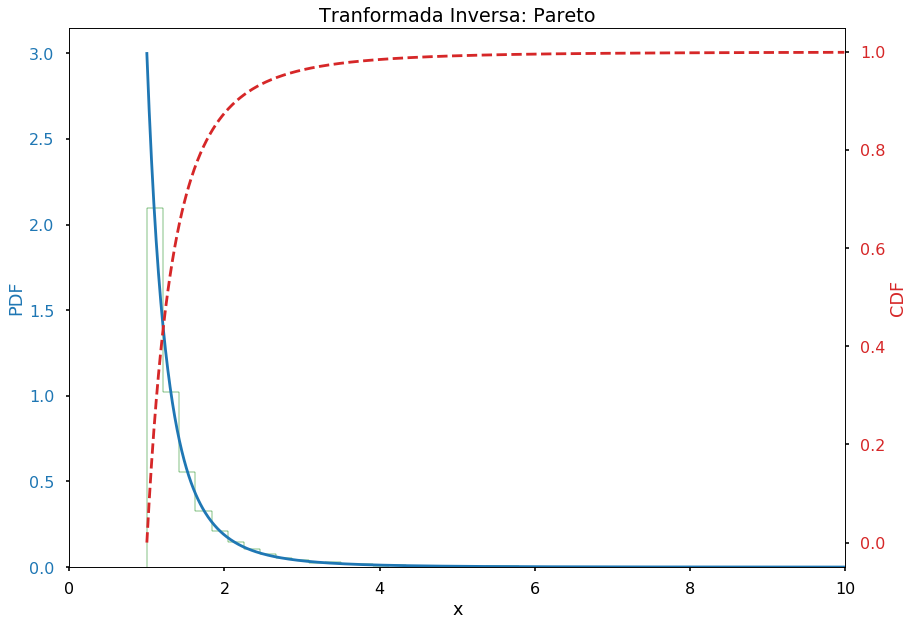

In [ ]:
# Função pareto:
x0, alpha = [1., 3.]
dx = 0.01
X = np.arange(1, 10, dx)

Ypdf = dist_par(x0=x0, alpha=alpha, X=X, tipo='pdf')
Ycdf = dist_par(x0=x0, alpha=alpha, X=X, tipo='cdf')

U = np.array([random.uniform(0, 1) for i in range(10000)])
Yitf = dist_par(x0=x0, alpha=alpha, X=U, tipo='itf')

# Gráfico

fig, ax1 = plt.subplots()

# PDF
color = 'tab:blue'
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color=color)
ax1.plot(X, Ypdf, color=color)
#ax1.hist(Yitf, int(1/dx), density=True, color='green', histtype='step') # versão nova do matplotlib
ax1.hist(Yitf, int(1 / dx), normed=True, color='green',
         histtype='step')  # versão antiga do matplotlib
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('CDF', color=color)
ax2.plot(X, Ycdf, 'r--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tranformada Inversa: Pareto')
fig.tight_layout()
ax1.set_xlim([0, 10])
plt.show()

---

## Questão 3: Contando domínios na Web. 

Quantos domínios web existem dentro da UFRJ? Mais precisamente, quantos domínios existem dentro do padrão de nomes http://www.[a-z](k).ufrj.br, onde [a-z](k) é qualquer sequência de caracteres de comprimento k ou menor? Construa um algoritmo de Monte Carlo para estimar
este número.

1. Descreva a variável aleatória cujo valor esperado está relacionado com a medida de interesse. Obtenha analiticamente o valor esperado da sua variável aleatória.
2. Calcule a variância dessa variável aleatória.
3. Implemente o método de Monte Carlo para gerar amostras da sua variável aleatória. Ou seja, você deve consultar o domínio gerado para determinar se o mesmo existe (utilize uma biblioteca www para isto).
4. Assuma que k = 4. Seja $\hat w_n$ o valor do estimador do número de domínios após $n$ amostras. Trace um gráfico de $\hat w_n$ em função de $n$ para $n = 1,\dots, 10^4$ (ou mais, se conseguir). O que você pode dizer sobre a convergência de $\hat w_n$?

Podemos definir o espaço amostral Z como todas as permutações possíveis de ```[a-z](1 até k)```.

Podemos definir a quantidade total de domínio válidos como $T$.

Podemos definir a V.A. indicadora $g(Z) = 1$ se o dominio existe, 0 c.c.

$E[g(Z)] = \sum p_i g_i(Z)$, onde $p_i = 1/|Z|$

De maneira que $E[g(Z)] = p_i T$, e $T=E[g(Z)]*|Z|$

In [ ]:
# https://www.[a-z](k).ufrj.br/


def gera_dominio(k):
    from itertools import product
    import string
    alfabeto = list(string.ascii_lowercase)
    dominio = []
    for ki in range(k):
        permuta_k = product(alfabeto, repeat=ki + 1)
        dominio_k = [''.join(i) for i in list(permuta_k)]
        dominio += dominio_k
    return dominio


dom = gera_dominio(4)
print(len(dom))
Z = len(dom)
print(dom[-5])

import httplib2


def check_domain(url_name):
    url = 'https://www.'+str(url_name)+'.ufrj.br/'
    h = httplib2.Http()
    try:
        resp = h.request(url, 'HEAD')
        status = int(resp[0]['status'])
        if status < 400:
            gx = 1
        else:
            gx = 0 
    except:
        status = np.nan
        gx = 0
    return gx


url = 'cos'
st = check_domain(url)
print(st)

In [10]:
def web_mc(n_amostras, Z):
    somatorio = 0
    for i in range(n_amostras):
        x = random.uniform(0, Z)
        teste = check_domain(dom[int(x)])
        somatorio += teste
    return Z * somatorio / n_amostras

#print(web_mc(100, Z))

In [ ]:
nepoch = 10**3
lista_soma = []
for epoch in np.arange(1, nepoch + 1):
    somaest = web_mc(epoch, Z)
    lista_soma.append(somaest)

xs = range(1, nepoch + 1)
ys = np.array(somaest)
plt.plot(xs, ys, '-', color="black")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N amostras')
plt.ylabel('Soma dos Domínios')
plt.title('Convergência do estimador Monte Carlo')
plt.show()

---

## Questão 4: Gerando amostras Normais.

Seja Z uma variavel aleatoria com distribuiçao Normal com media 0 e variancia 1. Em particular, a funçao densidade de Z e dada por:

$f_Z(x) = \frac{e^{−x^2/2}}{(√2π)}$ , com $−∞ < x < ∞$. 

Repare que Z assume valores positivos e negativos, mas com caudas que possuem a mesma probabilidade. Ou seja, $P[Z ≥ z] = P[Z ≤ −z]$, para todo z ≥ 0. 

Construa um gerador de números aleatórios para Z. Dica: Utilize o método de amostragem por rejeição!

***Resposta:***

O problema nos dá a função que queremos amostrar: $f(x) = \frac{e^{−x^2/2}}{(√2π)}$

Podemos utilizar como função envelope a função exponencial: $g(x) = \lambda e^{−\lambda x}$, com $\lambda=1$.

De acordo com o método de amostragem por rejeição, podemos gerar amostras de $f(x)$ da seguinte forma:

1. Geramos uma amostra de $g(x)$
2. Aceitamos essa amostra se: $Mg(x) \leq f(x)$
    * $M$ é uma constante que garante que $g(x)$ seja o melhor envelope possivel, e pode ser definida como: $M = máx \left(\frac{f(x)}{g(x)}\right)$
3. Repetimos os itens anteriores quantas vezes forem necessárias


In [ ]:
def f(x): # Distribuição Normal N(0,1)
    return np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))

def g(x): # Distribuição exponecial com lambda = 1
    return np.exp(-x)

x = np.arange(0,4,0.1)
M = max(f(x) / g(x))  # constante que multiplica a função envelope
print('A constante M é:',  '{:.5f}'.format(M))

def rejection_sampling(n_amostras=1000):
  samples = []
  x_samples = []
  for i in range(n_amostras):
    z = dist_exp(X=np.random.uniform(0, 1))
    u = np.random.uniform(0, M*g(z))
    if u <= f(z):
      samples.append(z)
  return np.array(samples)

A constante M é: 0.65774


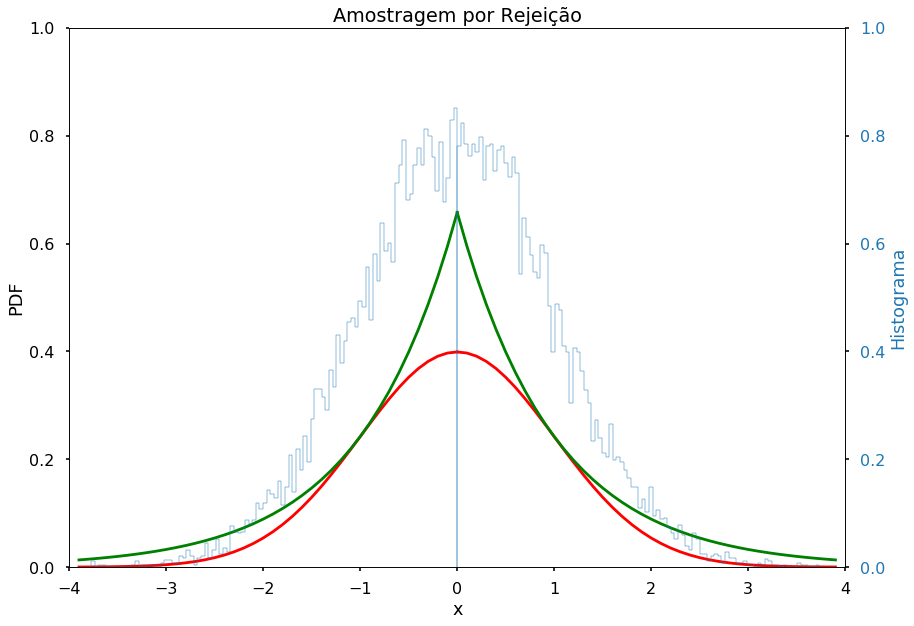

In [ ]:
# Gráfico

fig, ax1 = plt.subplots()

# PDF
ax1.set_xlabel('x')
ax1.set_ylabel('PDF', color='black')

ax1.plot(x, f(x), color='red')  # Normal positiva
ax1.plot(x, M * g(x), color='green')  # Exponencial positiva
ax1.plot(-x, f(x), color='red')  # Normal negativa
ax1.plot(-x, M * g(x), color='green')  # Exponencial negativa

ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim([0, 1])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Histograma', color=color)

# RS Positivo
sp = rejection_sampling(n_amostras=10000)
#ax2.hist(sp, 100, density=True, histtype='step', color=color) # versão atualizada matplotlib
ax2.hist(sp, 100, normed=True, histtype='step',
         color=color)  # versão antiga matplotlib

# RS Negativo
sn = -rejection_sampling(n_amostras=10000)
#ax2.hist(sn, 100, density=True, histtype='step', color=color) # versão atualizada matplotlib
ax2.hist(sn, 100, normed=True, histtype='step',
         color=color)  # versão antiga matplotlib

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 1])

plt.title('Amostragem por Rejeição')
fig.tight_layout()
ax1.set_xlim([-4, 4])
plt.show()

---

## Questão 5: Estimando somas com Importance Sampling.

Considere o problema visto em aula, de aplicar o metodo de Monte Carlo para estimar o valor de:

$G_N =\sum^N_{i=1} i log(i)$ 

Use sua intuicao para encontrar uma funcao de probabilidade proponente,
$h(i)$, que tenha variancia inferior ao melhor estimador visto em aula.


1. Assuma que $N = 10^6$. Calcule numericamente o segundo momento do seu estimador.
2. Implemente o metodo de Monte Carlo para estimar o valor de $G_N$. Trace um grafico do erro relativo do estimador, em funcao de \$n = 1, . . . , 10^7$(calcule o valor exato da soma para determinar o erro relativo).

In [ ]:
# Importance Sampling

---

## Questão 6: Integração de Monte Carlo.

Considere a funcao $f(x) = x^α$ com $α > 0$

Defina $g(α, a, b) = \int^b_a f(x)dx$ com $0 ≤ a < b$, como sendo a integral de $f(x)$ no intervalo $[a, b]$.

Iremos calcular $g$ usando Monte Carlo.

1. Determine analiticamente o valor de g(α, a, b). Dica: relembre Calculo I.
2. Descreva a variavel aleatoria cujo valor esperado esta relacionado com $g(α, a, b)$. Obtenha analiticamente o valor esperado da sua variavel aleatoria.
3. Implemente o método de Monte Carlo para gerar amostras da sua variável aleatoria, calculando a media amostral $M_n$ e utilizando-a para estimar $g(α, a, b)$. Repare que $α, a, b$ sao parametros do seu programa.
4. Seja $\hat g_n$ o valor do estimador apos $n$ amostras. Trace um gráfico do erro relativo do estimador, ou seja $|\hat g_n − g(α, a, b)|/g(α, a, b)$ em funcao de $n$, para $n = 1, . . . , 10^6$ (utilize escala log − log no grafico). Utilize os seguintes valores para os parametros: $α = {1, 2, 3}$, $a = 0, b = {1, 2, 4}$. O que voce pode concluir em relacao ao erro e os parametros?


**Respostas:**


***Item 1:***

Temos $f(x) = x^α$ com $α > 0$

Queremos resolver: $\int f(x) dx$

A solução analítica é dada por: $\int x^\alpha dx = \frac{x^{(1 + \alpha)}}{(1 + \alpha)} + C$


***Item 2:***

Queremos aproximar: 

$f_{ave} = \frac{1}{b-a} \int^b_a f(x) dx$

Podemos definir um V.A. indicadora $X = g(x)$ tal que: 
$g(x) = 1$, se $f(x)$ e $g(x) = 0$, c.c.

De maneira que podemos reescrever a integral da seguinte forma:

$E[g(x)] = \int g(x_i)p(x_i)dx$, onde $p(x) = \frac{1}{b-a}$ para $g(x)=1$, e $0$ c.c.

Que nos leva a:

$E[g(x)] = \frac{1}{b-a} \int g(x_i)dx$

$\int f(x)dx \approx \frac{1}{b-a} \int g(x_i)dx \approx (b-a)\frac{1}{N} \sum f(x)$

***Item 3:***

In [ ]:
def mc_fx(x, alpha=1):
    return x**alpha

def int_fx(alpha=1, a=0, b=1):
    return ( (b)**(1+alpha) - (a)**(1+alpha) ) / (1+alpha)


def integracao_mc(n_amostras=5000, linf=0, lsup=1, a=1):
    somatorio = 0
    for i in range(n_amostras):
        x = random.uniform(linf, lsup)
        somatorio += mc_fx(x, alpha=a)

    return (lsup - linf) * float(somatorio / n_amostras)


fx_mc = integracao_mc(n_amostras=5000)
print('Solução por MC:    A integral de f(x)(1,0,1) é:',  '{:.5f}'.format(fx_mc))
print('Solução analítica: A integral de f(x)(1,0,1) é:',  '{:.5f}'.format(int_fx()))

Solução por MC:    A integral de f(x)(1,0,1) é: 0.50486
Solução analítica: A integral de f(x)(1,0,1) é: 0.50000


***Item 4:***

Podemos concluir que, independente dos parâmetros do modelo, o estimador de Monte Carlo converge proporcionalmente a $\frac{1}{\sqrt N}$

In [ ]:
def plota_mc(erro_rel, nepoch):
    xs = range(1, nepoch + 1)
    ys = np.array(erro_rel)
    plt.plot(xs, ys, '-', color="black")
    plt.plot(xs, 1 / np.sqrt(xs), 'r--', color="red")  # 1/raiz(N)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('N amostras')
    plt.ylabel('Erro Relativo')
    titulo = 'Convergência do estimador Monte Carlo. {'+ str(alpha) + ','+ str(a)+ ',' + str(b)+ '}'
    plt.title(titulo)
    plt.show()

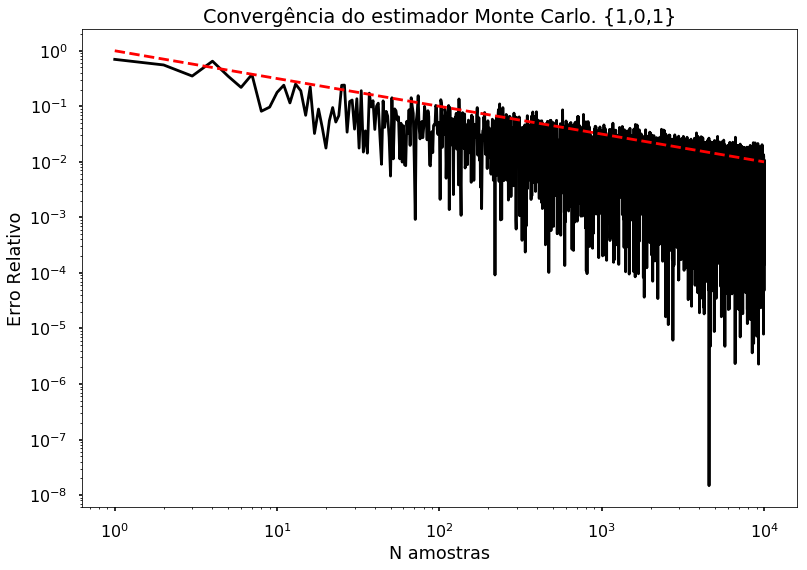

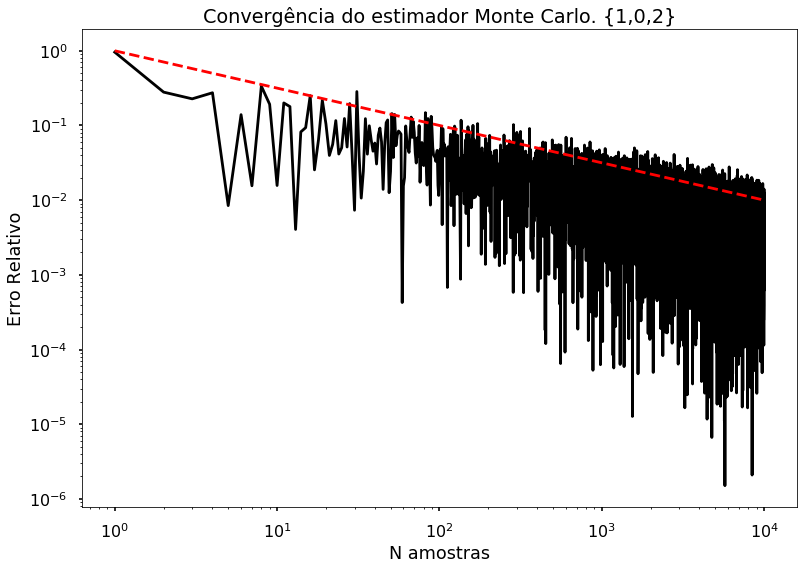

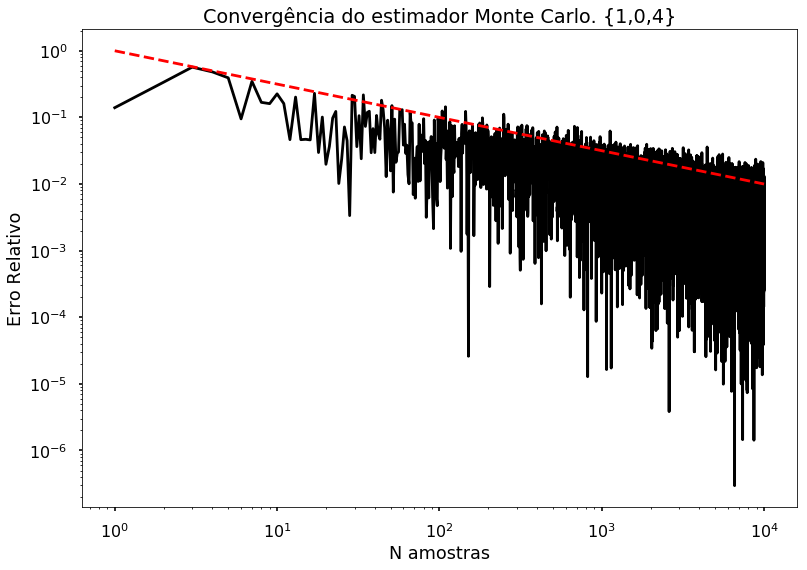

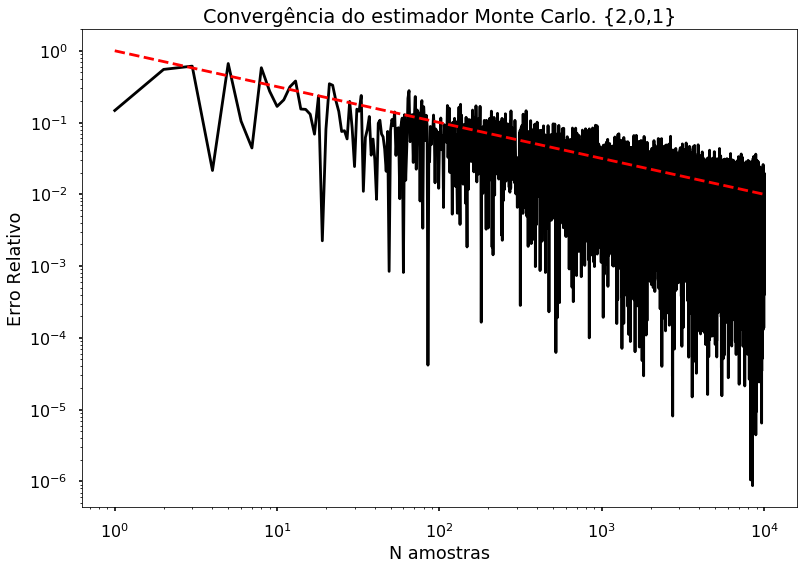

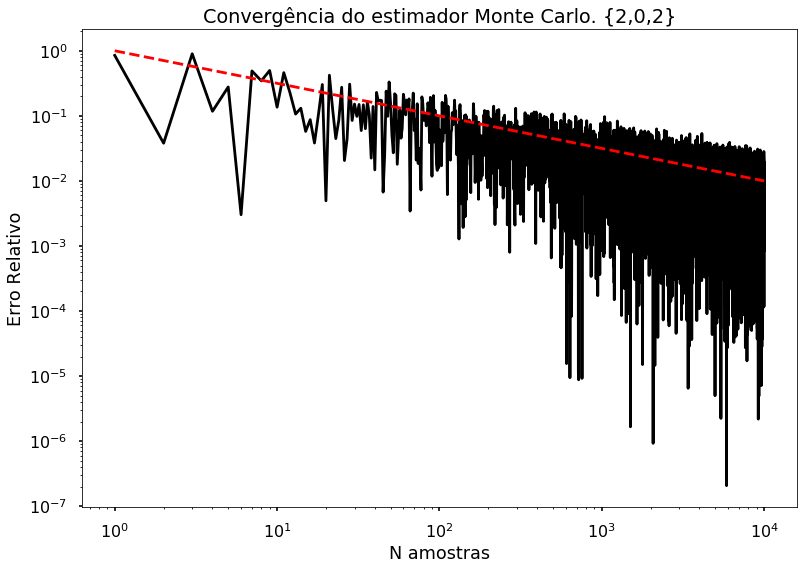

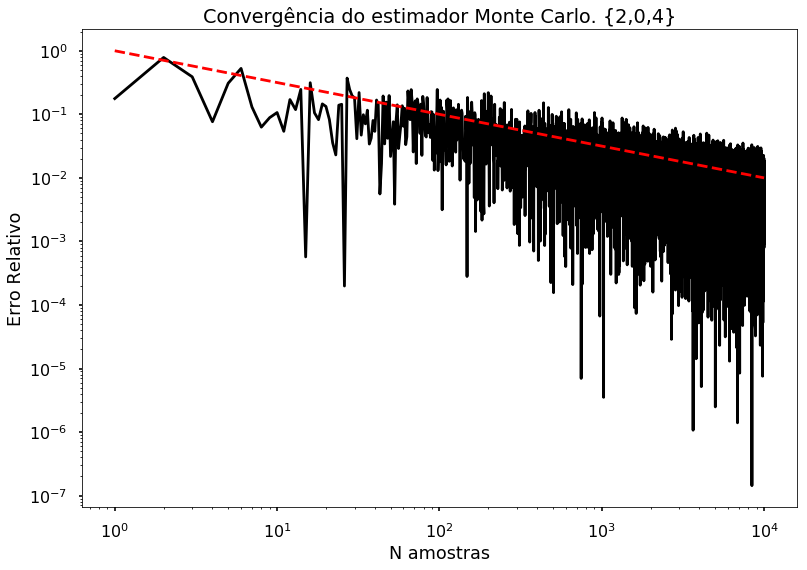

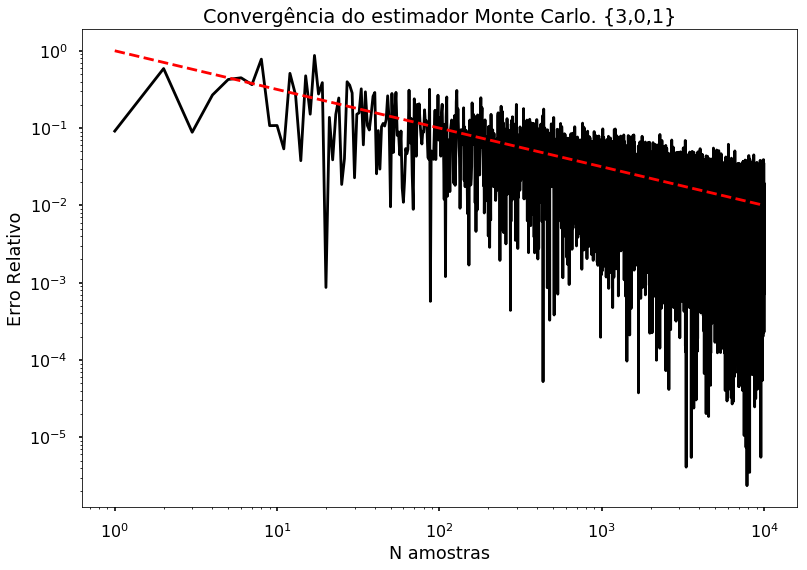

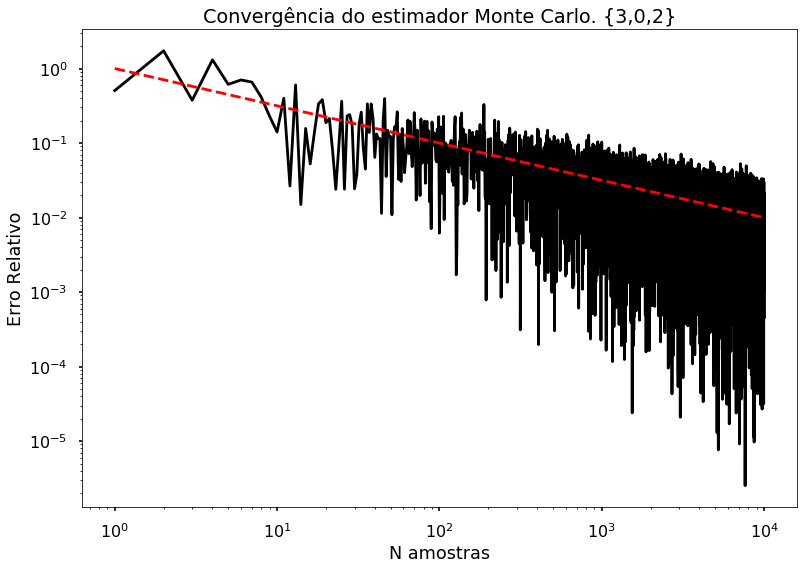

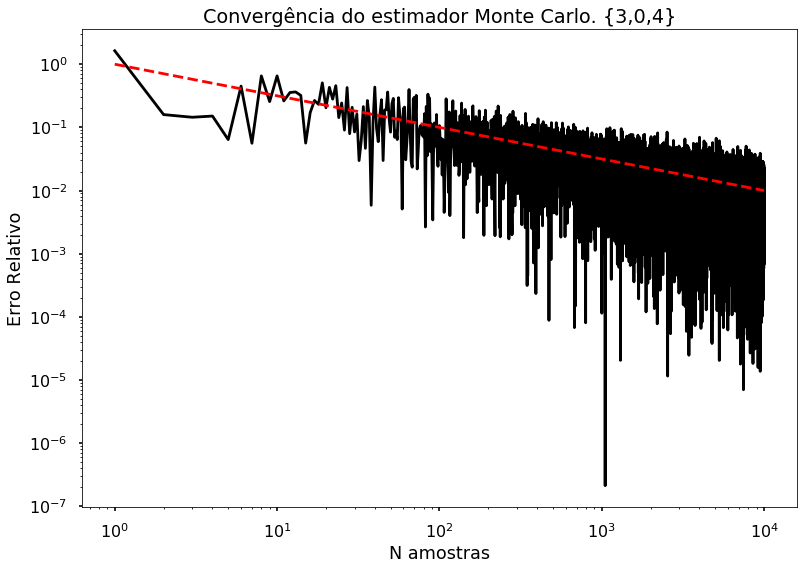

In [ ]:
alpha = [1, 2, 3]
a = [0]
b = [1, 2, 4]
nepoch = 10**4

from itertools import product

parametros = product(alpha, a, b)
for params in list(parametros):
    alpha, a, b = [params[0], params[1], params[2]]
    fx_int = int_fx(alpha=alpha, a=a, b=b)
    erro_rel = []
    for epoch in np.arange(1, nepoch + 1):
        fx_mc = integracao_mc(n_amostras=epoch, linf=a, lsup=b, a=alpha)
        er = abs(fx_mc - fx_int) / fx_int
        erro_rel.append(er)
    plota_mc(erro_rel, epoch)

---

## Questão 7: Gerando subconjuntos.

Considere $S_{k,n}$ um espaço amostral dado por todos os subconjunto de tamanho k dentre n objetos. Assuma que cada elemento deste espaço amostral tem a mesma probabilidade, dada por $1/|S_{k,n}|$.

1. Descreva um algoritmo eficiente para gerar amostras deste espaço. Dica: pense em permutacao!

2. Implemente seu algoritmo. Calcule o tempo médio de execucao fazendo $r = 10^3$ rodadas independentes para os seguintes parametros $n = \{10^4, 10^6, 10^8\}$, $k = \{10^1, 10^2, 10^3, 10^4\}$. Trace um gr ́afico com valores de k no eixo-x e diferentes curvas com os valores de n. O que você pode concluir?

```
algoritmo S_kn
  entrada: lista de objetos de tamanho n: N, 
          tamanho da amostra: k
  saída: amostra de tamanho k: R

  ## inicia R com os k primeiros itens de N
  for i = 1 até k
      R[i] := N[i]

  ## percorre todo N
  j := 0
  while j <= n
      u := inteiro aleatório entre 0 e i
      if u <= k
          ## substitui o item R[u] pelo item N[j] 
          R[u] := N[j]
      j=j+1
  
  return R
```

In [ ]:
import random 

def S_kn(N, k): 
  i=0
  n = len(N)
  R = [N[i] for i in range(k)]
  while(i < n):
    u = random.randrange(i+1)
    if(u < k):
      R[u] = N[i]
    i+=1
  return R

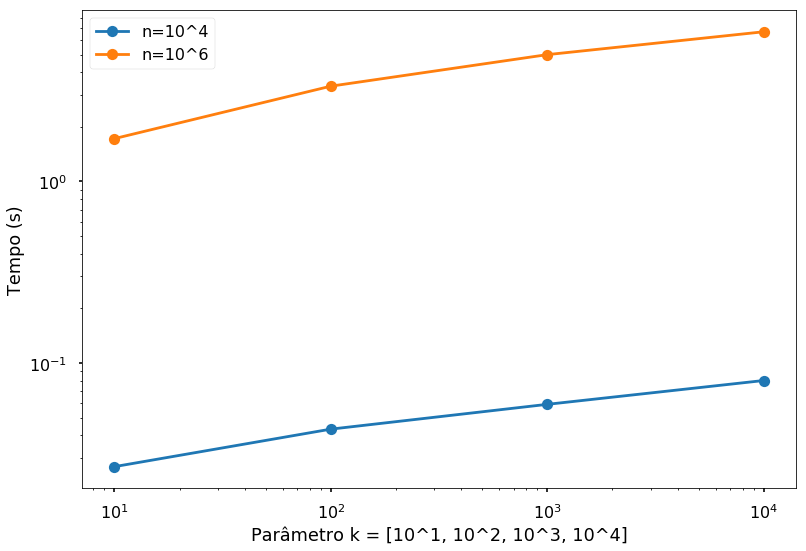

fim!


In [ ]:
import timeit

n = [10**4, 10**6]#, 10**8]
k = [10**1, 10**2, 10**3, 10**4]
r = 10**3

sumlapse = 0
for ni in n:
  xk = []
  yt = []
  for ki in k:
    for ri in range(r):
      start = timeit.default_timer()
      sampling = S_kn(range(ni), ki); 
      stop = timeit.default_timer()
      lapse = stop - start
      sumlapse+=lapse
    medlapse = sumlapse/r
    xk.append(ki)
    yt.append(medlapse)
  plt.plot(xk,yt,'o-')

plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
ax.legend(['n=10^4','n=10^6']) #,'n=10^8'])
plt.ylabel('Tempo (s)')
plt.xlabel('Parâmetro k = [10^1, 10^2, 10^3, 10^4]')
plt.show()
print('fim!')
